# Web Sitesinde Geçirilen Sürenin Testi


In [1]:
import numpy as np
import pandas as pd

In [2]:
olcum=np.random.randint(0,170,50)

In [3]:
olcum

array([ 70,  22, 118,  29, 135,  16, 163,  38,  49,  86,  89, 108,  17,
       169, 102, 166,   8,  85,  15,  79,  10,  11,  80,  51,  92,   5,
        61,  78, 162,  37,  83, 149,  91, 143, 155,  72,  76,  83,  27,
        89, 133, 109,  13,  72,  48, 147,  86,   2,  94,  82])

In [4]:
olcum[0:10]

array([ 70,  22, 118,  29, 135,  16, 163,  38,  49,  86])

In [5]:
import scipy.stats as stats

In [6]:
stats.describe(olcum)

DescribeResult(nobs=50, minmax=(2, 169), mean=78.1, variance=2385.2755102040815, skewness=0.19678584678986344, kurtosis=-0.8950876692612191)

# varsayımlar
#normallik varsayımı

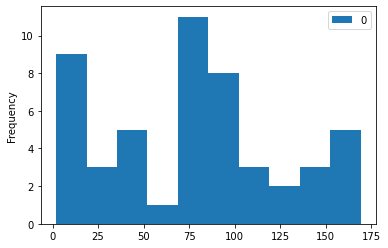

In [7]:
#histogram
pd.DataFrame(olcum).plot.hist();

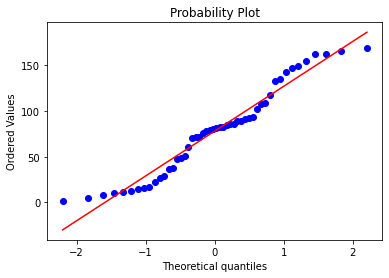

In [8]:
#qqplot
import pylab
stats.probplot(olcum,dist="norm",plot=pylab)
pylab.show()


# shapiro-wilks testi

h0(ilk hipotez türü):ornek dagılımı ile normal teorik dagılımı ar.anlamlı fark yok



h1:...var



sadece p valueya bakarak işimiz görülebilir p value 0.05den küçükse h0 ı reddet

In [9]:
from scipy.stats import shapiro


In [10]:
shapiro(olcum)

ShapiroResult(statistic=0.946153461933136, pvalue=0.023764995858073235)

# hipotez testinin uygulaması

ho:web sitemizde geçirilen süre 170




h1:...deildir

In [11]:
stats.ttest_1samp(olcum,popmean=170)#h0 reddetedemediğmiz zaman bu parametrik testi kullandık

Ttest_1sampResult(statistic=-13.30550121368721, pvalue=6.88323408319547e-18)

In [12]:
from statsmodels.stats.descriptivestats import sign_test#h1 reddetedemediğmiz zaman bu parametrik testi kullandık(simetrik ise örneklem)

In [13]:
sign_test(olcum,170)

(-25.0, 1.7763568394002505e-15)

# İş Uygulaması: Dönüşüm Oranı Testi
# tek örneklem t testi

In [14]:
#tek örneklem oran testi
from statsmodels.stats.proportion import proportions_ztest

In [15]:
count=40
nobs=500
value=0.125

In [16]:
proportions_ztest(count,nobs,value)

(-3.7090151628513017, 0.0002080669689845979)


# Bağımsız 2 örneklem t testi 

h0:m1=m2




h1:m1!=m2

In [17]:
#veri tipi 1

In [18]:
a=np.random.randint(19,30,30)

In [19]:
b=np.random.randint(28,39,30)

In [20]:
A=pd.DataFrame(a)
B=pd.DataFrame(b)

In [21]:
A_B=pd.concat([A,B],axis=1)
A_B.columns=["A","B"]

In [22]:
A_B.head()

,A,B
0,28,38
1,22,30
2,20,33
3,23,29
4,19,35


In [23]:
#veri tipi 2

In [24]:
#A ve A nın grubu
GRUP_A=np.arange(len(A))
GRUP_A=pd.DataFrame(GRUP_A)
GRUP_A[:]="A"
A=pd.concat([A,GRUP_A],axis=1)

#B ve B nın grubu
GRUP_B=np.arange(len(B))
GRUP_B=pd.DataFrame(GRUP_B)
GRUP_B[:]="B"
B=pd.concat([B,GRUP_B],axis=1)

#Tüm veri
AB=pd.concat([A,B])
AB.columns=["gelir","grup"]
print(AB.head())
print(AB.tail())

   gelir grup
0     28    A
1     22    A
2     20    A
3     23    A
4     19    A
    gelir grup
25     32    B
26     36    B
27     33    B
28     36    B
29     33    B


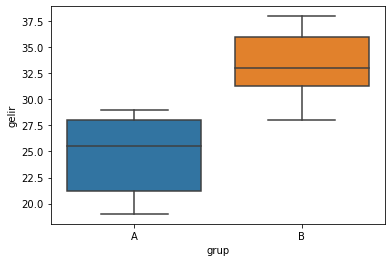

In [25]:
import seaborn as sns
sns.boxplot(x="grup",y="gelir",data=AB);

# varsayım kontrolü

In [26]:
#normallik varsayımı

In [27]:
shapiro(A_B.A)

ShapiroResult(statistic=0.894916296005249, pvalue=0.006321904715150595)

In [28]:
shapiro(A_B.B)

ShapiroResult(statistic=0.9459885954856873, pvalue=0.13189953565597534)

In [29]:
#varyans homojenliği varsayımı

h0:varyanslar homojendir



h1:..deildir

In [30]:
stats.levene(A_B.A,A_B.B)

LeveneResult(statistic=1.9159956076134697, pvalue=0.17160189093282)

# HİPOTEZ TESTİ

In [31]:
stats.ttest_ind(A_B["A"],A_B["B"],equal_var=True)

Ttest_indResult(statistic=-10.173412559212535, pvalue=1.635091067434065e-14)

# Nonparametrik Bağımsız İki Örneklem Testi

In [32]:
stats.mannwhitneyu(A_B["A"],A_B["B"])

MannwhitneyuResult(statistic=21.5, pvalue=1.1170057278037326e-10)

# BAĞIMLI 2 ÖRNEKLEM T TESTİ

hO:oncesi=sonrası
h1:oncesi!=sonrası

In [33]:
oncesi=pd.DataFrame(np.random.randint(115,124,40))
sonrası=pd.DataFrame(np.random.randint(115,130,40))

In [34]:
oncesi[0:5]

,0
0,120
1,117
2,116
3,119
4,117


In [35]:
sonrası[0:5]

,0
0,115
1,117
2,123
3,127
4,129


# varsayım kontrolleri

In [36]:
df=pd.concat([oncesi,sonrası],axis=1)
df.columns=["oncesı","sonrasi"]
df

,oncesı,sonrasi
0,120,115
1,117,117
2,116,123
3,119,127
4,117,129
5,121,127
6,122,119
7,117,127
8,117,125
9,123,124


In [37]:
shapiro(df.oncesı)

ShapiroResult(statistic=0.9480315446853638, pvalue=0.0648924708366394)

In [38]:
shapiro(df.sonrasi)

ShapiroResult(statistic=0.9459423422813416, pvalue=0.05503299832344055)

In [39]:
stats.levene(df.oncesı,df.sonrasi)

LeveneResult(statistic=12.666103413315309, pvalue=0.0006375620023872795)

# hipotez testi

In [40]:
stats.ttest_rel(df.oncesı,df.sonrasi)

Ttest_relResult(statistic=-4.783524528433911, pvalue=2.473738463881568e-05)

bunlarda da %95 güvenilirlik var

# Nonparametrik Bağımlı İki Örneklem Testi


In [41]:
stats.wilcoxon(df.oncesı,df.sonrasi)

WilcoxonResult(statistic=89.5, pvalue=0.0001266906624176059)

# İki Örneklem Oran Testi

In [42]:
basarı_sayısı=np.array([300,250])
gozlem_sayısı=np.array([1000,1100])

In [43]:
proportions_ztest(count=basarı_sayısı,nobs=gozlem_sayısı)

(3.7857863233209255, 0.0001532232957772221)

bunun varsayımı n 30 dan buyuk olması o yüzden yapmadık

# Varyans Analizi

h0:m1 m2 m3 arasında grup ortamaları ar. farklılık yok


h1:var

In [45]:
A=pd.DataFrame(np.random.randint(25,32,30))
B=pd.DataFrame(np.random.randint(27,36,30))
C=B=pd.DataFrame(np.random.randint(36,43,30))
dfs=[A,B,C]
ABC=pd.concat(dfs,axis=1)
ABC.columns=["grup_a","grup_b","grup_c"]
ABC.head()

,grup_a,grup_b,grup_c
0,31,42,42
1,27,40,40
2,26,42,42
3,29,40,40
4,27,40,40


# Varsayım Kontrolü

In [46]:
#işlemler bağımssız mı yapılmış:evet

In [47]:
shapiro(ABC.grup_a)

ShapiroResult(statistic=0.9028987288475037, pvalue=0.009895355440676212)

In [51]:
shapiro(ABC["grup_a"])

ShapiroResult(statistic=0.9028987288475037, pvalue=0.009895355440676212)

In [48]:
shapiro(ABC.grup_b)

ShapiroResult(statistic=0.8978602290153503, pvalue=0.007448099087923765)

In [52]:
shapiro(ABC["grup_b"])

ShapiroResult(statistic=0.8978602290153503, pvalue=0.007448099087923765)

In [49]:
shapiro(ABC.grup_c)

ShapiroResult(statistic=0.8978602290153503, pvalue=0.007448099087923765)

In [53]:
shapiro(ABC["grup_c"])

ShapiroResult(statistic=0.8978602290153503, pvalue=0.007448099087923765)

In [54]:
stats.levene(ABC["grup_a"],ABC["grup_b"],ABC["grup_c"])

LeveneResult(statistic=0.00975445677766572, pvalue=0.9902940465178205)

# Hipotez Testi

In [56]:
from scipy.stats import f_oneway

In [57]:
f_oneway(ABC["grup_a"],ABC["grup_b"],ABC["grup_c"])

F_onewayResult(statistic=249.98979841671394, pvalue=8.589873035233114e-37)

In [58]:
ABC.describe().T

,count,mean,std,min,25%,50%,75%,max
grup_a,30.0,28.100000,2.139126,25.0,26.0,28.0,30.0,31.0
grup_b,30.0,38.933333,2.180372,36.0,37.0,39.0,41.0,42.0
grup_c,30.0,38.933333,2.180372,36.0,37.0,39.0,41.0,42.0


# Nonparametrik Hipotez Testi

In [59]:
from scipy.stats import kruskal

In [60]:
kruskal(ABC["grup_a"],ABC["grup_b"],ABC["grup_c"])

KruskalResult(statistic=59.791488691122915, pvalue=1.0385877559472456e-13)

# Korelasyon Analizi gerçek hayat iş uygulaması

p=0 korelasyon yok
   
   

p!=0 korelasyon var

In [62]:
tips=sns.load_dataset("tips")
df=tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [63]:
df["total_bill"]=df["total_bill"]-df["tip"]

In [64]:
#korelasyon hesaplıyıcaksan 2 si arasında tip değişkeninden arınması lazım yani biz saf total bill ve tip arasındaki korelasyona bakmamız lzm

In [65]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,15.98,1.01,Female,No,Sun,Dinner,2
1,8.68,1.66,Male,No,Sun,Dinner,3
2,17.51,3.50,Male,No,Sun,Dinner,3
3,20.37,3.31,Male,No,Sun,Dinner,2
4,20.98,3.61,Female,No,Sun,Dinner,4


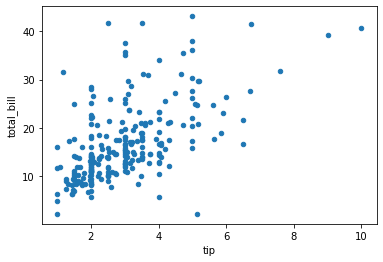

In [66]:
df.plot.scatter("tip","total_bill");

# varsayım kontrolü

In [67]:
shapiro(df["tip"])

ShapiroResult(statistic=0.897811233997345, pvalue=8.20057563521992e-12)

In [68]:
shapiro(df["total_bill"])

ShapiroResult(statistic=0.9135652184486389, pvalue=1.1060377613780759e-10)

# Hipotez Testi

# korelasyon katsayısı

In [70]:
df["tip"].corr(df["total_bill"])#pearson korelasyonu(normallik sağlanırsa olur)

0.5766634471096374

In [71]:
df["tip"].corr(df["total_bill"],method="spearman")#sağlanmazsa olur

0.593691939408997

# korelasyon anlamlılığının testi

In [72]:
from scipy.stats.stats import pearsonr

In [73]:
pearsonr(df["tip"],df["total_bill"])

(0.5766634471096381, 5.018290084948419e-23)

In [76]:
stats.pearsonr(df["tip"],df["total_bill"])

(0.5766634471096381, 5.018290084948419e-23)

# Nonparametrik Kolerasyon Hipotez Testi

In [74]:
stats.spearmanr(df["tip"],df["total_bill"])

SpearmanrResult(correlation=0.593691939408997, pvalue=1.2452285137560276e-24)

In [75]:
stats.kendalltau(df["tip"],df["total_bill"])

KendalltauResult(correlation=0.4400790074919885, pvalue=7.131027725873721e-24)

p valuelar bilimsel gösterimle gösterilmiş normalde 4 5 basamak sola kaymaları lzm